# 순차 데이터(sequential data)

- 텍스트나 시계열 데이터(time series data)와 같이 순서에 의미가 있는 데이터
    - 예) "I am a boy"는 의미를 이해할 수 있지만 "boy am I a"는 의미를 이해할 수 없음
    - 일별 온도 데이터에서 날짜 순서가 섞인다면 내일의 온도를 쉽게 예상하기 어려움
    
- 감성분석에서는 이전에 입력된 데이터를 기억하는 기능이 중요할 수 있음
    - 예) "별로지만 추천해요"에서 "추천해요"를 해석할 때 앞의 "별로지만"을 기억하고 있어야 무조건 긍정이라고 판단하지 않는다.
    - 퍼셉트론이나 CNN은 이런 기억장치가 없음
        - 하나의 배치를 사용하여 정방향 연산을 수행하고 나면 해당 샘플은 다음 샘플을 처리할 때 사용하지 않음
        - 이처럼 입력 데이터의 흐름이 앞으로만 전달되는 신경망을 피드포워드 신경망(feedforward neural network:FFNN)이라고 함
    - 신경망이 이전에 처리했던 샘플을 다음 샘플을 처리할 때 재사용하기 위해서는 데이터가 신경망 층에서 순환을 해야 함

# 순환 신경망(recurrent neural network : RNN)
<img src = "./image/rnn.png">

## 순환 신경망 구조

- 피드포워드 신경망에 이전 데이터의 처리 흐름을 순환하는 고리 하나만 추가된 형태
    - 바로 이전에 사용했던 데이터를 재사용하는 구조

<img src = "./image/rnn_image1.png">

1. 첫 번째 샘플 x0을 처리하고 출력 h0이 다시 뉴런으로 입력됨
    - h0에는 x0에 대한 정보가 포함되어 있음
    
2. x1을 처리할 때 h0을 함께 사용
    - h0과 x1을 사용해서 만든 h1에는 x0에 대한 정보가 어느 정도 포함되어 있음
    
3. x2를 처리할 때 h1을 함께 사용
    - 결과물 h2에는 x1과 x0에 대한 정보도 담겨있음
    
- 위의 과정처럼 샘플을 처리하는 각 단계를 타임스텝(timestep)이라고 말함
    - 순환 신경망은 이전 타임스텝의 샘플을 기억한다.

- 타입스텝이 오래될수록 순환되는 정보는 희미해짐

- 순환신경망에서는 layer를 셀(cell)이라고 부른다.
    - 하지만 입력에 가중치를 곱하고 활성화 함수를 통과시켜 다음 층으로 전달하는 기본 구조는 똑같음
    - 한 셀에는 여러 개의 뉴런이 있지만 일반적으로 모든 뉴런을 표시하지 않고 하나의 셀로 층을 표현한다.
    
- 셀의 출력은 은닉 상태(hidden state)라고 부름


## 하이퍼볼릭 탄젠트 함수

<img src = "./image/tanh.png">

- 일반적으로 은닉층의 활성화 함수로는 하이퍼볼릭 탄젠트(hyperbolic tangent)함수인 tanh가 많이 활용된다.
    - tanh함수는 -1 ~ 1 사이의 범위를 가짐
    - RNN은 미분 계산이 많이 들어간다. 시그모이드는 미분의 최대값이 0.2정도 된다고 한다. 미분하고 계산하다보면 기울기 값이 점점 소실되는 문제가 있다. 하이퍼볼릭 탄젠트는 미분 최대값이 1.0으로 되어서 기울기가 소실되는 문제가 생기지 않아서 사용한다.

## 가중치 공유

<img src = "./image/rnn_weight.png">

- 순환 신경망도 피드포워드 신경망과 같이 입력값과 가중치를 곱하지만 이전 타임스텝의 은닉상태에 곱해지는 가중치가 하나 더 있음
- 모든 타임스텝에서 사용되는 가중치 w는 하나임
    - 가중치 w는 타임스텝에 따라 변화되는 뉴런의 출력을 학습
- 맨 처음 타임스텝1에서 사용되는 이전 은닉상태 h0은 이전 타임스텝이 없기 때문에 0으로 초기화

## 파라미터 수

<img src = "./image/rnn_param.png">

- 각 뉴런의 은닉 상태가 다음 스텝에 재사용될 때 모든 뉴런에 값이 전달된다.
    - 즉, 이전 타임스텝의 은닉 상태는 다음 타임스텝의 모든 뉴런에 완전연결됨
- 순환신경망의 파라미터 수 = (유닛 수 * 유닛 수) + (입력값의 수 * 유닛 수) + 유닛 수

- i를 4가지 방법으로 해석하고 am이 들어와 4개의 유닛에 들어올 때 i를 다 갖다 쓴다.

    - 첫 번째 방법으로 해석한 유닛이 자기가 해석한 i의 정보도 받고 2번째 유닛이 해석한 정보, 3,4번째 유닛이 해석한 정보도 받아 취합해서       am을 해석한다.

- boy가 입력되면 1번째 유닛은 i와 am이라는 정보를 해석한 것이 있고 2번째, 3,4번째도 가지고 있다. 이 정보로 boy를 해석한다.

- 파라미터 수 : unit개수 * unit개수 + input개수 * unit개수 + y절편

## 입력

- 합성곱 층의 입력은 하나의 샘플이 3개의 차원을 가진다
    - 너비, 높이, 채널
    
- 순화층은 일반적으로 샘플마다 2개의 차원을 가짐
    - 하나의 샘플을 하나의 시퀀스(sequence)라고 말함
    - 하나의 시퀀스 안에는 여러 개의 아이템이 들어 있음
    - 시퀀스의 길이(단어 수)가 타임 스텝의 길이가 됨
        - 예) 샘플 "I am a boy"는 4개의 아이템으로 구성된 시퀀스
        - 각 아이템을 3개의 숫자로 표현한다면 타임스텝의 크기는 (1, 4, 3), (배치차원, 아이템 수, 몇개의 숫자로 표현하나)
        
- 입력이 순환층을 통과하면 순환층의 뉴런 개수만큼 출력됨
    - 하나의 샘플은 (단어의 개수, 단어 표현)의 2차원 배열 (I am a boy는 (4, 3))
    - 순환층을 통과하면 1차원 배열로 바뀜
        - 이 1차원 배열의 크기는 순환층의 뉴런의 개수
    - 기본적으로 순환층은 마지막 타임스텝의 은닉 상태만 출력으로 내보냄
        - 입력된 시퀀스를 모두 읽어서 정보를 마지막 은닉 상태에 압축하여 전달
        
- 이미지 일때, (50000, 28, 28, 1)
    - 1개의 차원을 가진 28x28이미지가 50,000개
- 문자일 때 (10000, 10, 3)
    - 3개의 숫자로 표현하는 10개의 단어를 가진 문장 10,000개
    
- 만약 순환층을 여러 개 쌓는다면
    - 순환층의 입력은 샘플마다 타임스텝과 단어 표현으로 이루어진 2차원 배열이어야 함
        - 첫 번째 셀이 마지막 타임스텝의 은닉 상태만 출력한다면 입력 형식이 맞지 않음
        - 이 경우에는 마지막 셀을 제외한 모든 셀은 모든 타임스텝의 은닉 상태를 출력
        - 마지막 셀은 마지막 타임스텝의 은닉 상태만 출력

## 출력

- 순환 신경망도 합성곱 신경망과 마찬가지로 마지막에 밀집층을 두어 클래스를 분류
    - 다중 분류 : 출력층에 클래스 개수만큼 뉴런을 두고 소프트맥스 출력층 함수 사용
    - 이진 분류 : 하나의 뉴런을 두고 시그모이드 출력층 함수 사용
    
- 합성곱 신경망과의 차이점은 마지막 셀이ㅡ 출력이 1차원이기 때문에 Flatten이 필요 없음

## 데이터 준비

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Embedding
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 전체 데이터셋에서 가장 자주 등장하는 단어 500개만 사용
# num_words : 단어 빈도가 많은 순서로 num_words만큼 보존한다
num_words = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = num_words)

In [3]:
# 훈련 세트, 테스트 세트의 크기 확인
print(x_train.shape, x_test.shape)

(25000,) (25000,)


In [4]:
# 리뷰의 길이 출력

len(x_train[0]), len(x_train[1])

(218, 189)

- 첫번째 문장의 길이는 218, 두번째 문장의 길이는 189로 문장의 길이가 제각각이다

In [5]:
# 리스트로 묶여 있다, 다차원 배열이 아님
type(x_train[0])

list

- 각각 25000개의 샘플로 이루어져 있음
- 텍스트 길이가 제각각임
    - 고정 크기의 2차원 배열에 담는 것 보다 리뷰마다 별도의 파이썬 리스트로 담아야 메모리를 효율적으로 사용할 수 있다.
    

In [6]:
# 첫번째 리뷰 출력
print(x_train[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [7]:
# 타깃 데이터
# 0: 부정, 1 : 긍정
print(y_train[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [8]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 8)

### 각 리뷰의 길의 확인

- 각 리뷰의 길이를 넘파이 배열로 담아 평균 리뷰 길이, 길이 최솟값, 길이 최댓값을 확인하자

In [9]:
lengths = np.array([len(x) for x in x_train])

In [10]:
# 길이 평균값과 중간값
print(np.mean(lengths), np.median(lengths), np.min(lengths), np.max(lengths))

237.84055 178.0 11 2494


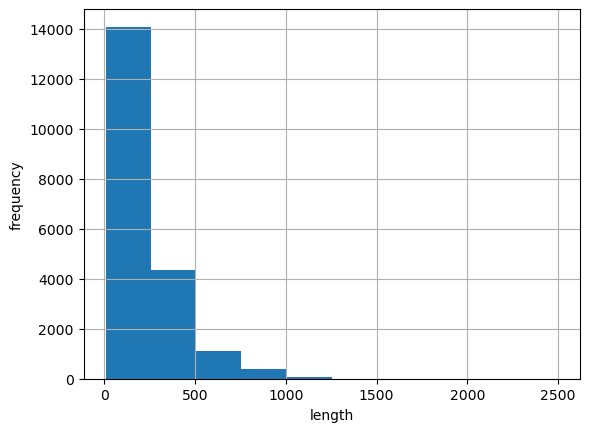

In [26]:
plt.figure()

plt.hist(lengths)

plt.xlabel("length")
plt.ylabel("frequency")
plt.grid()

- 평균이 중간값보다 높은 이유는 아주 큰 데이터가 있기 때문
- 대부분의 리뷰는 짧기 때문에 이번 예제에서는 리뷰의 길이를 100에 맞추서 사용
    - 100보다 짧으니 리뷰는 길이를 100에 맞추기 위해 패딩이 필요
        - 패딩을 나타내는 토큰으로는 0을 사용 (아무것도 없는 빈칸을 사용하기 때문)

In [27]:
# x_train의 길이를 100으로 맞추자
# 100보다 길면 100으로 짜르고, 100보다 짧으면 0으로 패딩하여 100의 길이로 맞춰준다.
max_len = 100
train_seq = pad_sequences(x_train, maxlen = max_len)

In [28]:
# train_seq 크기 확인
print(train_seq.shape)

(20000, 100)


In [29]:
print(train_seq[0])
print(len(train_seq[0]))

[ 81  13   2  18   2   2  11   4   2   2   5  33  31 213  16   2   8   2
   6   2   2  13 258  14  22  11   4   2   2   2  12  33   4   2   6   2
   7  84 188   2   2   5  69   8   2   4   2   2  91   7  98 303 301  13
 115   2   6   2   2 100  30  38 394  14  22   5 160   2   2   9 434   2
  11  94  91   2   2   2 115   2  12  13  64   2  13 100  28 258   6   2
  54  61 476  71   2   2   2  11 312 396]
100


In [30]:
print(x_train[0])

[1, 13, 219, 14, 22, 11, 94, 2, 11, 4, 2, 2, 422, 12, 9, 2, 5, 100, 30, 4, 2, 7, 4, 2, 7, 341, 201, 2, 11, 4, 2, 2, 2, 4, 2, 7, 38, 446, 2, 2, 134, 2, 14, 31, 144, 30, 2, 2, 18, 316, 2, 8, 2, 8, 2, 54, 25, 67, 2, 341, 11, 32, 94, 2, 189, 25, 434, 48, 25, 28, 101, 2, 33, 32, 79, 6, 2, 2, 23, 4, 2, 2, 8, 2, 2, 51, 31, 2, 7, 2, 42, 2, 33, 4, 2, 70, 81, 13, 2, 18, 2, 2, 11, 4, 2, 2, 5, 33, 31, 213, 16, 2, 8, 2, 6, 2, 2, 13, 258, 14, 22, 11, 4, 2, 2, 2, 12, 33, 4, 2, 6, 2, 7, 84, 188, 2, 2, 5, 69, 8, 2, 4, 2, 2, 91, 7, 98, 303, 301, 13, 115, 2, 6, 2, 2, 100, 30, 38, 394, 14, 22, 5, 160, 2, 2, 9, 434, 2, 11, 94, 91, 2, 2, 2, 115, 2, 12, 13, 64, 2, 13, 100, 28, 258, 6, 2, 54, 61, 476, 71, 2, 2, 2, 11, 312, 396]


In [31]:
print(x_train[0][-20:])

[12, 13, 64, 2, 13, 100, 28, 258, 6, 2, 54, 61, 476, 71, 2, 2, 2, 11, 312, 396]


- pad_sequences() 함수는 기본적으로 maxlen보다 긴 시퀀스의 앞부분을 잘라냄
    - 일반적으로 시퀀스의 뒷부분의 정보가 더 유용하기 때문에
        - 리뷰끝에 결정적인 소감을 말할 가능성이 높기 때문
    - 시퀀스의 뒷부분을 잘라내고 싶다면
        - truncating 매개변수 값을 "post"로 바꿔주면 된다.
            - 기본값은 "pre" (앞부분을 자른다)

In [32]:
train_seq[2]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,  14,   9,   6, 128,   2,
         7,   4, 274,  74,   4,  31,  19,   2, 261,  13, 423,  15,  31,
        99,  12, 218,  38,  76,  15,   2,   9, 128,  36,  26, 199,  55,
        52,  21,  15,   4,   2,   9, 128,   2,   9,   6,   2,  33,   2,
         2,  18,   2,   5,   4, 365,   2, 133,  26,  55,  52,  45,  24,
       179,  17,   2,  17,   4, 363,   2,  21,  45, 491,   5,  13, 197,
        15,   4,   2,   5,   4,   2, 165,   2, 128])

- 뒷부분에 중요한 단서가 있을 가능성이 높다고 생각하기 때문에 앞쪽에 0을 붙여준다.

In [33]:
print(x_train[2])

[1, 14, 9, 6, 128, 2, 7, 4, 274, 74, 4, 31, 19, 2, 261, 13, 423, 15, 31, 99, 12, 218, 38, 76, 15, 2, 9, 128, 36, 26, 199, 55, 52, 21, 15, 4, 2, 9, 128, 2, 9, 6, 2, 33, 2, 2, 18, 2, 5, 4, 365, 2, 133, 26, 55, 52, 45, 24, 179, 17, 2, 17, 4, 363, 2, 21, 45, 491, 5, 13, 197, 15, 4, 2, 5, 4, 2, 165, 2, 128]


- 패딩 토큰은 시퀀스의 앞부분에 추가됨
    - 시퀀스의 마지막에 있는 단어가 셀의 은닉상태에 가장 큰 영향을 미치게 되기 때문에
    - 뒷부분에 패딩을 추가하고 싶다면
        - padding 매개변수의 값을 "post"로 수정
            - 기본값은 "pre"

- x0부터 xn까지 있는 문장으로 rnn을 하면 처음에 h0에는 x0이라는 정보가 담기고 h1에는 x0, x1이라는 정보 ... hn에는 x0 ... xn까지 담겨서 hn이 출력된다면
  x0의 기억은 희미해지고 xn이 가장 뚜렷하다 따라서 뒤에를 강조

In [34]:
# 검증 세트의 길이를 100으로 맞추기
val_seq = pad_sequences(x_val, maxlen = max_len)

### 모델 구성

In [35]:
from tensorflow.keras.layers import Dense

In [36]:
model = Sequential()

model.add(Embedding(num_words,32, input_length = 100))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = "sigmoid"))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 32)           16000     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 18,113
Trainable params: 18,113
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["acc"])

In [39]:
es = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)
mc = keras.callbacks.ModelCheckpoint("./model/rnn-model.h5", save_best_only = True)

### 모델 학습

In [40]:
history = model.fit(train_seq, y_train,
                   epochs = 100, 
                   batch_size = 128,
                   validation_data = (val_seq, y_val), 
                   callbacks = [es, mc])

Epoch 1/100
157/157 [==============================] - 3s 14ms/step - loss: 0.6151 - acc: 0.6543 - val_loss: 0.5383 - val_acc: 0.7492
Epoch 2/100
157/157 [==============================] - 2s 13ms/step - loss: 0.4921 - acc: 0.7680 - val_loss: 0.5294 - val_acc: 0.7402
Epoch 3/100
157/157 [==============================] - 2s 13ms/step - loss: 0.4674 - acc: 0.7838 - val_loss: 0.4652 - val_acc: 0.7820
Epoch 4/100
157/157 [==============================] - 2s 13ms/step - loss: 0.4498 - acc: 0.7930 - val_loss: 0.4954 - val_acc: 0.7620
Epoch 5/100
157/157 [==============================] - 2s 13ms/step - loss: 0.4359 - acc: 0.8048 - val_loss: 0.6271 - val_acc: 0.7220
Epoch 6/100
157/157 [==============================] - 2s 13ms/step - loss: 0.4201 - acc: 0.8102 - val_loss: 0.4906 - val_acc: 0.7824
Epoch 7/100
157/157 [==============================] - 2s 13ms/step - loss: 0.4073 - acc: 0.8181 - val_loss: 0.5023 - val_acc: 0.7640
Epoch 8/100
157/157 [==============================] - 2s 13ms

### 시각화

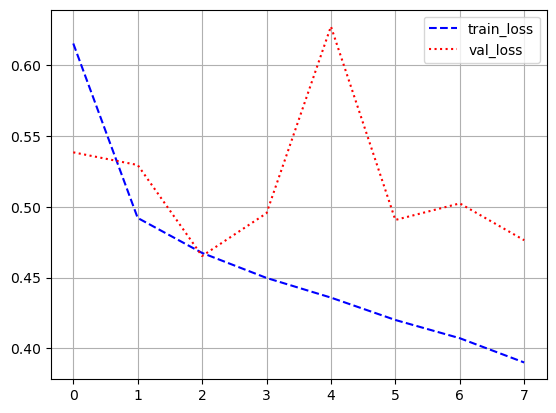

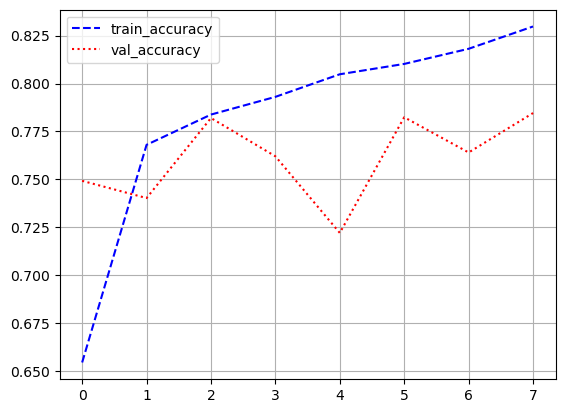

In [42]:
plt.plot(history.history["loss"], 'b--', label = "train_loss")
plt.plot(history.history["val_loss"], 'r:', label = "val_loss")
plt.legend()
plt.grid()

plt.figure()
plt.plot(history.history["acc"], 'b--', label = "train_accuracy")
plt.plot(history.history["val_acc"], 'r:', label = "val_accuracy")
plt.legend()
plt.grid()

In [43]:
model.evaluate(val_seq, y_val)

157/157 [==============================] - 0s 3ms/step - loss: 0.4652 - acc: 0.7820


[0.46521449089050293, 0.7820000052452087]

- SimpleRNN은 긴 시퀀스를 처리하는데 적합하지 않음

- SimpleRNN은 실전에 사용하기엔 너무 단순

- SimpleRNN은 이론적으로 시간 $t$ 에서 이전의 모든 타임스텝의 정보를 유지할 수 있지만, 실제로는 긴 시간에 걸친 의존성은 학습할 수 없음

- 그래디언트 소실 문제(vanishing gradient problem)
  - 이를 방지하기 위해 LSTM, GRU 같은 레이어 등장



# LSTM(Long Short-Term Memory)
- 장단기 메모리 알고리즘

- 나중을 위해 정보를 저장함으로써 오래된 시그널이 점차 소실되는 것을 막아줌

  <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png">

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

<img src = "./image/lstm.png" width = 500 height = 500>

- 은닉 상태를 만드는 방법
    - output gate layer(출력 게이트)
        1. 입력과 이전 타임스텝의 은닉 상태를 가중치에 곱한 후 활성화 함수를 통과시켜 다음 은닉 상태를 만듦
            - 이 때 기본 순환층과는 달리 시그모이드 활성화 함수를 사용
        2. tanh 활성화 함수를 통과한 값과 곱해져서 은닉 상태를 만듦
        
- LSTM은 순환 되는 상태가 2개
    - 은닉 상태
    - 셀 상태(cell state)
        - 다음 층으로 전달되지 않고 LSTM 셀에서 순환만 되는 값
        
- 셀 상태를 계산하는 과정
    - forget gate layer(삭제 게이트)
        - 정보를 제거하는 역할
        1. 입력과 은닉 상태를 또 다른 가중치에 곱한 다음 시그모이드 함수를 통과
        2. 이전 타임스텝의 셀 상태와 곱하여 새로운 셀 상태를 만듦
            - 이 셀 상태가 오른쪽에서 tanh 함수를 통과하여 새로운 은닉 상태를 만드는 데 기여
            
    - input gate layer(입력 게이트)
        - 새로운 정보를 셀 상태에 추가
        1. 입력과 은닉 상태를 각기 다른 가중치에 곱함
        2. 하나는 시그모이드 함수, 하나는 tanh 함수를 통과
        3. 두 결과를 곱함
        4. 이전 셀 상태와 더함

### 모델 훈련

In [44]:
model2 = Sequential()
model2.add(Embedding(num_words, 32, input_length = 100))
model2.add(LSTM(32))
model2.add(Dense(1, activation = "sigmoid"))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 32)           16000     
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 24,353
Trainable params: 24,353
Non-trainable params: 0
_________________________________________________________________


In [45]:
model2.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["acc"])

In [46]:
es = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)
mc = keras.callbacks.ModelCheckpoint("./model/lstm-model.h5", save_best_only=True)

In [48]:
history2 = model2.fit(train_seq, y_train,
           epochs = 100,
           batch_size = 128,
           validation_data = [val_seq, y_val],
           callbacks = [es, mc])

Epoch 1/100
157/157 [==============================] - 7s 36ms/step - loss: 0.6274 - acc: 0.6344 - val_loss: 0.5210 - val_acc: 0.7492
Epoch 2/100
157/157 [==============================] - 5s 33ms/step - loss: 0.4748 - acc: 0.7732 - val_loss: 0.4812 - val_acc: 0.7724
Epoch 3/100
157/157 [==============================] - 5s 33ms/step - loss: 0.4426 - acc: 0.7970 - val_loss: 0.4593 - val_acc: 0.7900
Epoch 4/100
157/157 [==============================] - 5s 33ms/step - loss: 0.4314 - acc: 0.8004 - val_loss: 0.4412 - val_acc: 0.7966
Epoch 5/100
157/157 [==============================] - 5s 33ms/step - loss: 0.4253 - acc: 0.8080 - val_loss: 0.5712 - val_acc: 0.7604
Epoch 6/100
157/157 [==============================] - 5s 33ms/step - loss: 0.4157 - acc: 0.8097 - val_loss: 0.4310 - val_acc: 0.8008
Epoch 7/100
157/157 [==============================] - 5s 33ms/step - loss: 0.4100 - acc: 0.8124 - val_loss: 0.4309 - val_acc: 0.7982
Epoch 8/100
157/157 [==============================] - 5s 33ms

### 시각화

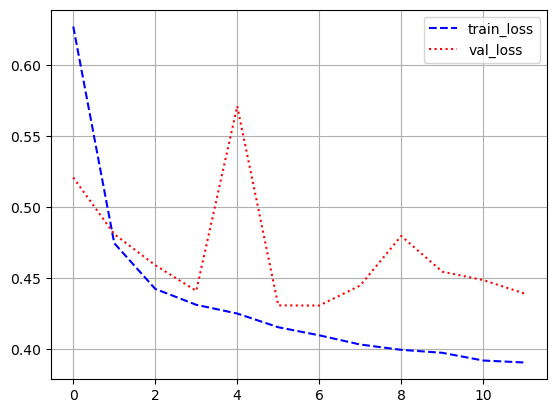

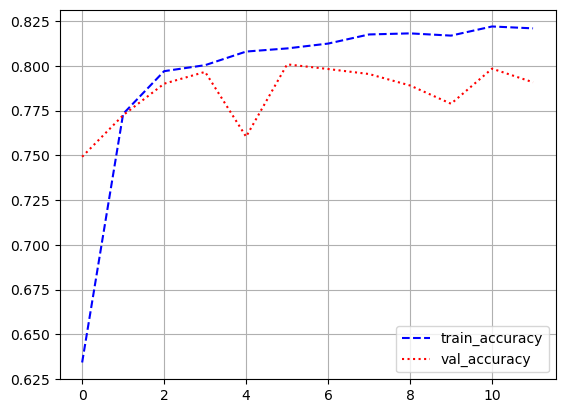

In [49]:
plt.plot(history2.history["loss"], 'b--', label = "train_loss")
plt.plot(history2.history["val_loss"], 'r:', label = "val_loss")
plt.legend()
plt.grid()

plt.figure()
plt.plot(history2.history["acc"], 'b--', label = "train_accuracy")
plt.plot(history2.history["val_acc"], 'r:', label = "val_accuracy")
plt.legend()
plt.grid()

In [50]:
model2.evaluate(val_seq, y_val)

157/157 [==============================] - 1s 6ms/step - loss: 0.4309 - acc: 0.7982


[0.43089842796325684, 0.7982000112533569]

# GRU (Gated Recurrent Unit)
- LSTM을 더 단순하게 만든 구조

- 기억 셀은 없고, 시간방향으로 전파하는 것은 은닉 상태만 있음

- reset gate
  - 과거의 은닉 상태를 얼마나 무시할지 결정

  - $r$ 값이 결정

- update gate
  -  은닉 상태를 갱신하는 게이트  

  - LSTM의 forget, input gate 역할을 동시에 함
  
  <img src="https://miro.medium.com/max/1400/1*jhi5uOm9PvZfmxvfaCektw.png" width="500">

### 모델 구성

In [51]:
model3 = Sequential()
model3.add(Embedding(num_words, 32, input_length = 100))
model3.add(GRU(32))
model3.add(Dense(1, activation = "sigmoid"))

In [52]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 32)           16000     
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 22,369
Trainable params: 22,369
Non-trainable params: 0
_________________________________________________________________


In [53]:
model3.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["acc"])

In [54]:
es = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)
mc = keras.callbacks.ModelCheckpoint("./model/gru-model.h5", save_best_only=True)

In [55]:
history3 = model3.fit(train_seq, y_train,
                     epochs = 100, 
                     batch_size = 128,
                     validation_data = (val_seq, y_val),
                     callbacks = [es, mc])

Epoch 1/100
157/157 [==============================] - 7s 33ms/step - loss: 0.6430 - acc: 0.6141 - val_loss: 0.5264 - val_acc: 0.7256
Epoch 2/100
157/157 [==============================] - 5s 30ms/step - loss: 0.4808 - acc: 0.7716 - val_loss: 0.5592 - val_acc: 0.7102
Epoch 3/100
157/157 [==============================] - 5s 30ms/step - loss: 0.4500 - acc: 0.7911 - val_loss: 0.5367 - val_acc: 0.7612
Epoch 4/100
157/157 [==============================] - 5s 30ms/step - loss: 0.4426 - acc: 0.7962 - val_loss: 0.4480 - val_acc: 0.7868
Epoch 5/100
157/157 [==============================] - 5s 31ms/step - loss: 0.4357 - acc: 0.7989 - val_loss: 0.4659 - val_acc: 0.7806
Epoch 6/100
157/157 [==============================] - 5s 31ms/step - loss: 0.4303 - acc: 0.8026 - val_loss: 0.4464 - val_acc: 0.7866
Epoch 7/100
157/157 [==============================] - 5s 31ms/step - loss: 0.4252 - acc: 0.8062 - val_loss: 0.4400 - val_acc: 0.7972
Epoch 8/100
157/157 [==============================] - 5s 32ms

### 시각화

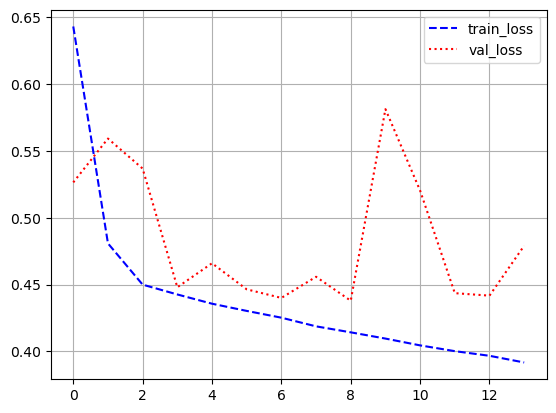

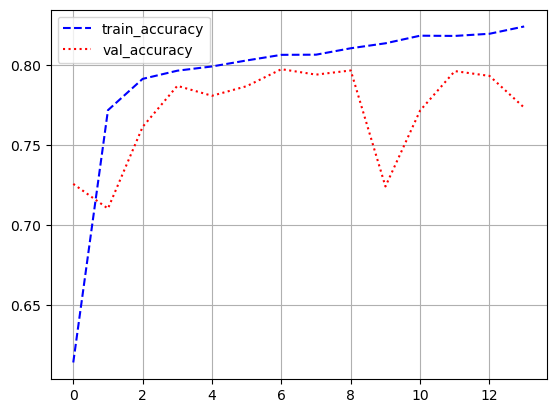

In [56]:
plt.plot(history3.history["loss"], 'b--', label = "train_loss")
plt.plot(history3.history["val_loss"], 'r:', label = "val_loss")
plt.legend()
plt.grid()

plt.figure()
plt.plot(history3.history["acc"], 'b--', label = "train_accuracy")
plt.plot(history3.history["val_acc"], 'r:', label = "val_accuracy")
plt.legend()
plt.grid()

### 모델평가

In [58]:
model3.evaluate(val_seq, y_val)

157/157 [==============================] - 1s 5ms/step - loss: 0.4379 - acc: 0.7964


[0.43792885541915894, 0.7964000105857849]

# best model 검증

In [59]:
test_seq = pad_sequences(x_test, maxlen = 100)
lstm_model = keras.models.load_model("./model/lstm-model.h5")
lstm_model.evaluate(test_seq, y_test)

782/782 [==============================] - 5s 6ms/step - loss: 0.4176 - acc: 0.8075


[0.4176388680934906, 0.807479977607727]